In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) 

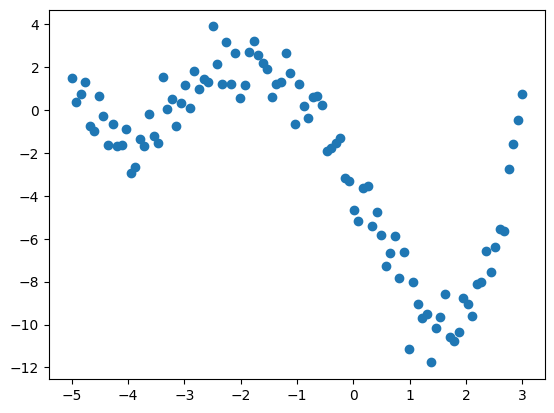

In [2]:
X=np.linspace(-5,3,100)
y=0.1*(X-3)*(X+3)*(X+1)*(X+5)+ np.random.normal(1,size=100)
plt.scatter(X,y)

In [3]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LinearRegression

reg = LinearRegression() #학습할 모형
kfold = KFold(n_splits=5, shuffle=True) #데이터 쪼갤 방식

# https://scikit-learn.org/stable/modules/model_evaluation.html
metrics = ['neg_mean_absolute_error','neg_mean_squared_error','r2'] # 교차검증하면서 기록할 평가지표

result=cross_validate(X=X.reshape(-1,1), #X데이터
                      y=y,#y데이터
                      estimator=reg, #학습시킬 모델
                      scoring=metrics, #평가할 지표
                      cv=kfold, # 교차검증 방식
                      return_train_score=True                      
                     )

In [4]:
# 딕셔너리에 키값으로 교차검증 결과가 저장되어있다.
result

{'fit_time': array([0.        , 0.00100636, 0.00103617, 0.        , 0.        ]),
 'score_time': array([0.00144982, 0.        , 0.        , 0.        , 0.        ]),
 'test_neg_mean_absolute_error': array([-2.58557279, -2.23626973, -3.10803415, -2.18092571, -3.10959098]),
 'train_neg_mean_absolute_error': array([-2.60441647, -2.68883189, -2.47477151, -2.708356  , -2.48761685]),
 'test_neg_mean_squared_error': array([ -9.50585184,  -7.44427391, -12.82076647,  -6.49563989,
        -11.91068564]),
 'train_neg_mean_squared_error': array([ -9.30983312,  -9.83179324,  -8.48301154, -10.12768362,
         -8.82380516]),
 'test_r2': array([0.47592421, 0.51410165, 0.39634081, 0.53825165, 0.15005667]),
 'train_r2': array([0.46110231, 0.45435437, 0.48789463, 0.41427808, 0.51147908])}

In [5]:
# 결과의 사용
test_mae = -result['test_neg_mean_absolute_error'].mean()
test_mse = -result['test_neg_mean_squared_error'].mean()
test_r2 = result['test_r2'].mean()
print(test_mae, test_mse, test_r2)

2.6440786744211113 9.635443549180517 0.4149349978499952
